In [141]:
import numpy as np
import matplotlib.pyplot as plt
# %maplotlib inline
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#colors 
blue = '#0B7091'

# Missing Title

## Chapter 1
### Getting to know kagglers
Lets begin by seeing what type of people answered the questionaire! 

In [10]:
multChoice = pd.read_csv('multipleChoiceResponses.csv',delimiter= ',',header=1,low_memory=False)

Text(0,0.5,'Percentage of kagglers')

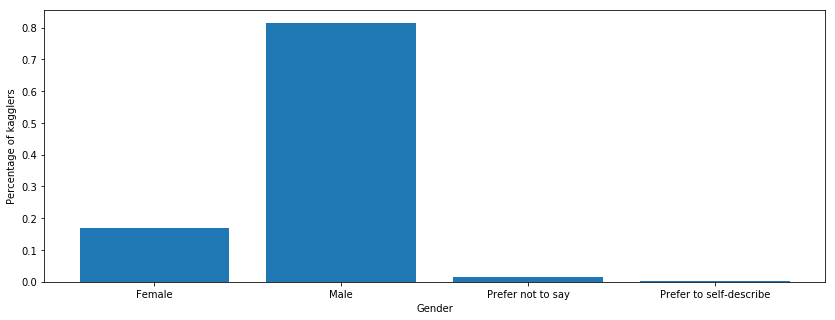

In [42]:
gender = multChoice['What is your gender? - Selected Choice'].value_counts()

fig = plt.figure(figsize = (14,5))
xs = gender.keys()
ys = gender.values/sum(gender.values)
plt.bar(xs,ys)
plt.xlabel('Gender')
plt.ylabel('Percentage of kagglers')

**80% of kagglers are men!** and less than 20% identify themselves as women!! 
<!-- <center> -->
![gender inequality](http://leher.org/ee/images/uploads/article_images/hitchwritersagst.gif)
<!-- <center/> -->



Text(0.5,0,'Age')

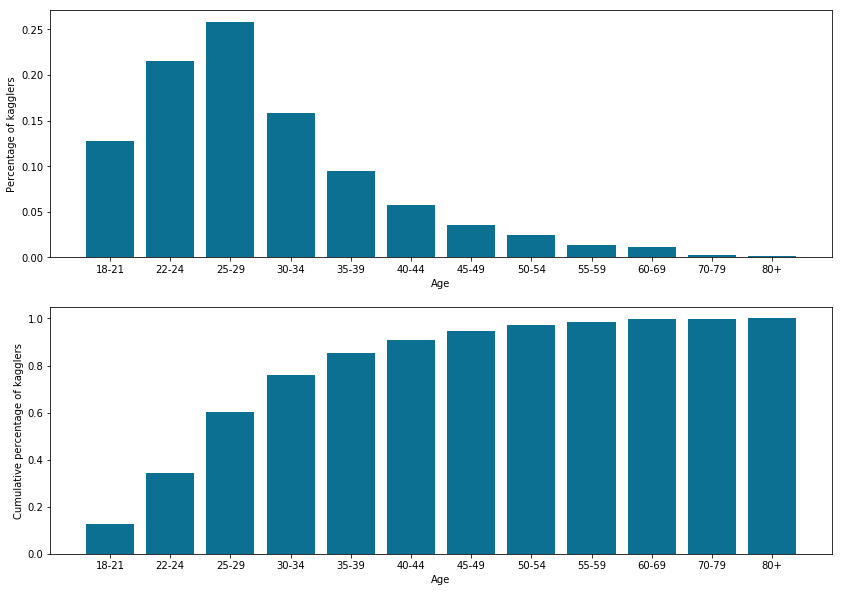

In [59]:

age = multChoice[multChoice.columns[3]].value_counts()

fig = plt.figure(figsize = (14,10))
plt.subplot(2,1,1)
xs = age.keys()
ys = age.values/sum(gender.values)
plt.bar(xs,ys,color=blue)

plt.ylabel('Percentage of kagglers')


plt.xlabel('Age')

plt.subplot(2,1,2)
xs = age.keys()
ys = age.values/sum(gender.values)
arr1inds = xs.argsort()
xs = xs[arr1inds[::]]
ys = ys[arr1inds[::]]


ys = np.cumsum(ys)

plt.bar(xs,ys,color=blue)

plt.ylabel('Cumulative percentage of kagglers')


plt.xlabel('Age')

Almost **80% of kagglers are under 35!** Considerably lower age than average job age distributions.



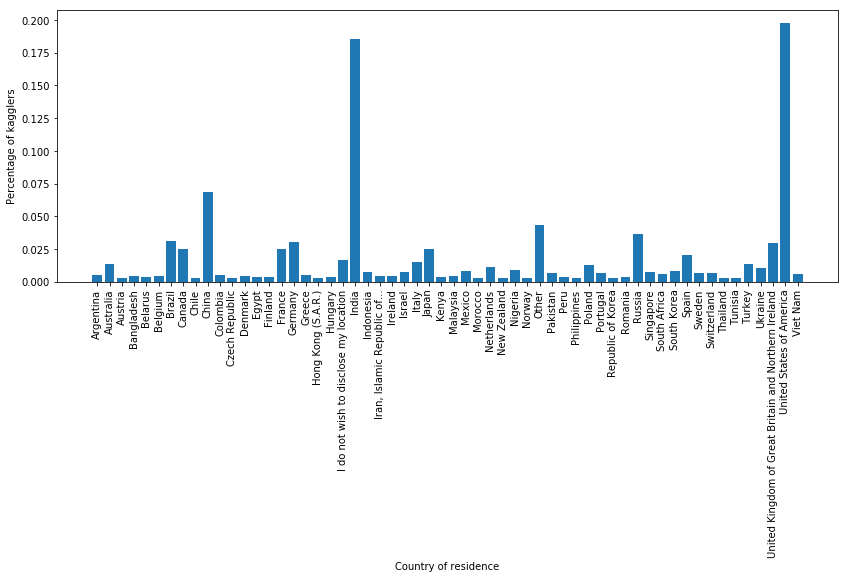

In [75]:
country = multChoice[multChoice.columns[4]].value_counts()

fig = plt.figure(figsize = (14,5))
xs = country.keys()
ys = country.values/(sum(country.values))



plt.bar(xs,ys)
plt.xlabel('Country of residence')
plt.ylabel('Percentage of kagglers')

# fig = plt.figure(figsize = (14,5))
# histo = plt.hist(multChoice[multChoice.columns[4]],color = blue)
a = plt.xticks(rotation='vertical')
# plt.xlabel('Country of residence')

Kagglers come mainly from India and USA! Then China, "Other" and Russia. 

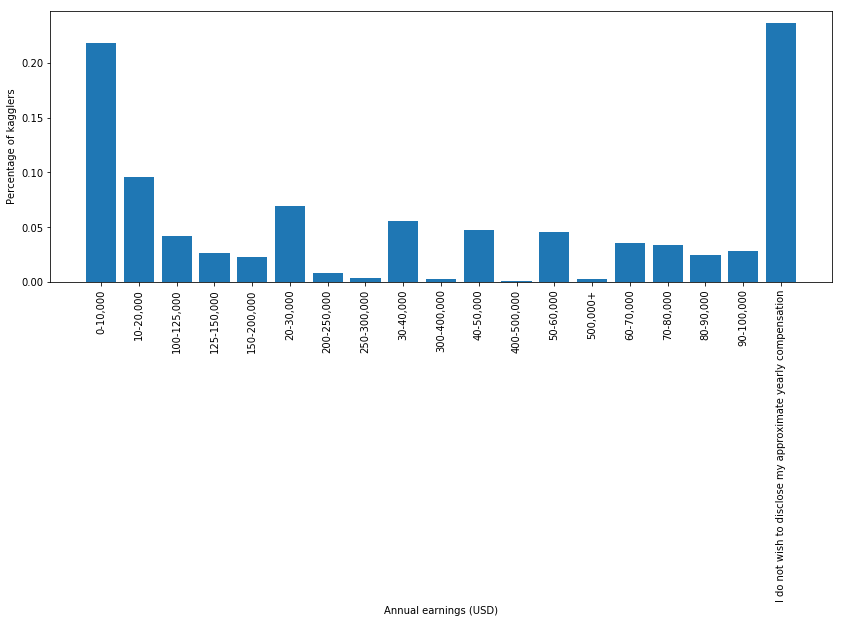

In [95]:
earnings = multChoice[multChoice.columns[12]].value_counts()

fig = plt.figure(figsize = (14,5))
xs = earnings.keys()
ys = earnings.values/(sum(earnings.values))



plt.bar(xs,ys)
plt.xlabel('Annual earnings (USD)')
plt.ylabel('Percentage of kagglers')

# fig = plt.figure(figsize = (14,5))
# histo = plt.hist(multChoice[multChoice.columns[4]],color = blue)
a = plt.xticks(rotation='vertical')
# plt.xlabel('Country of residence')

Most Kagglers dont make much money!! That is likely because they are students

In [ ]:
What is your current yearly compensation (approximate $USD)?


# Chapter 2
## What determines how much money a kaggler makes? 

In [104]:
feats = multChoice.columns
target = feats[12]
feats = feats.delete(12)

In [124]:
rfData = multChoice.copy()
labEncods = {}
for c in rfData.columns:
    if(rfData[c].dtype=='object'):
        
        le = preprocessing.LabelEncoder()
        uniques = rfData[c].unique()
        uniques=['missing' if x is np.nan else x for x in uniques]
#         print(uniques)
        le.fit(uniques)
        labEncods[c]=le
        rfData[c]=['missing' if x is np.nan else x for x in rfData[c]]
        rfData[c] = le.transform(rfData[c]) 
#         print(c)
#         print(multChoice[c].unique())

In [136]:
rfData = rfData.fillna(0)


In [160]:
# all_train, all_test = train_test_split(rfData,test_size= 0.25)
rf = RandomForestClassifier(n_estimators=500)

In [161]:
rf.fit(rfData[feats],rfData[target])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [162]:
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]



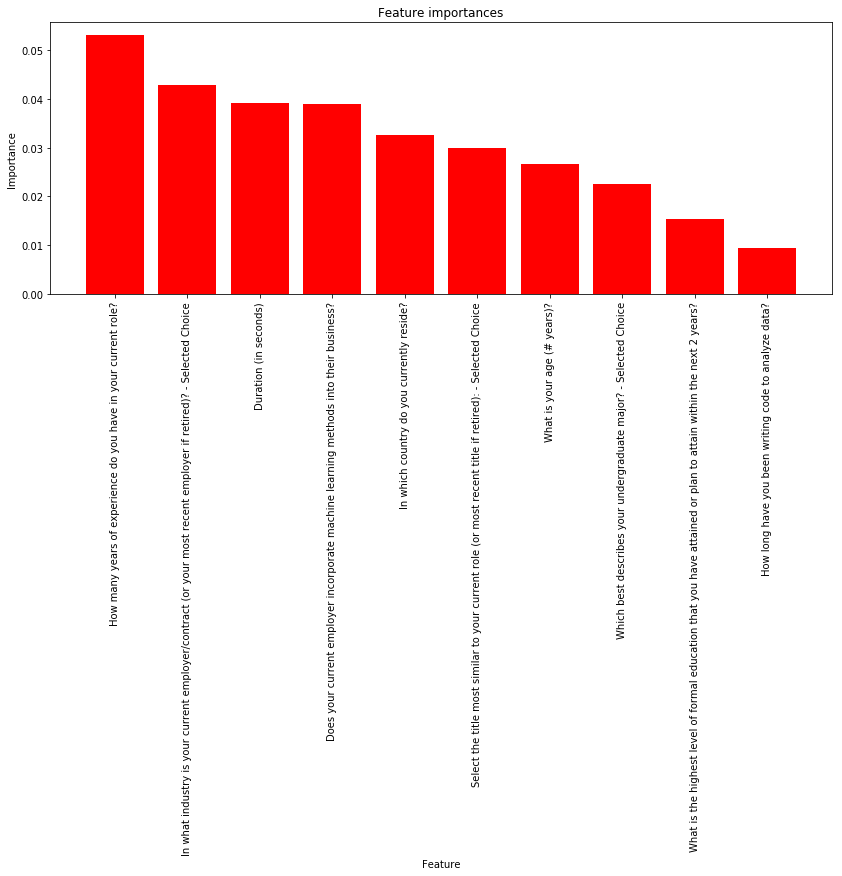

In [164]:
X = rfData[feats]
# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure(figsize = (14,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1])[:10], importances[indices][:10],
       color="r", yerr=std[indices][:10], align="center")
plt.xticks(range(X.shape[1])[:10], feats[indices],rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Feature')


### The top 5 most important features for determining how much money kagglers make are: 

In [167]:
feats[indices][:5]

Index(['How many years of experience do you have in your current role?',
       'In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice',
       'Duration (in seconds)',
       'Does your current employer incorporate machine learning methods into their business?',
       'In which country do you currently reside?'],
      dtype='object')

1. The first feature is no surprise, the more experience, the higher the salary! 

2. The second feature is no surprise either, the type of industry you work at will, to a great extent, determine how much money you make! 

3. The third feature however is a great surprise. The amount of time taken to answer the survey determines how much money you make!! It could have something to do with the years of experience - the older a person gets, the slower they answer surveys (?)

4. Incorporating machine learning methods is extremely important! Do so to get \$\$\$

5. Live in a first world country! :D